# Creating an ML model which attempts to predict house prices in Melbourne 

## Data Preprocessing

In [ ]:
#melbourne housing data
import pandas as pd
data = pd.read_csv("C:/Users/Toxicr0ak/Downloads/melbourne-housing-market/Melbourne_housing_FULL.csv")
data.info()

In [28]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


### Filling in the missing values from the columns of the dataset with the mean of the column

In [29]:
data.fillna(data.mean(), inplace=True)

### Correlation Matrix

In [30]:
data.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.404908,0.271511,0.085890,0.819099,0.529191,0.337780,0.030136,0.098468,-0.008660,0.004254,0.090140,-0.071675
Price,0.404908,1.000000,-0.186848,0.040511,0.327485,0.324631,0.154545,0.026460,0.065301,-0.200789,-0.170840,0.154873,-0.052934
Distance,0.271511,-0.186848,1.000000,0.481566,0.239091,0.111939,0.211768,0.048717,0.050110,0.220757,-0.089506,0.179113,-0.018140
Postcode,0.085890,0.040511,0.481566,1.000000,0.080398,0.108110,0.060746,0.032452,0.029252,0.063422,-0.208542,0.327576,0.017108
Bedroom2,0.819099,0.327485,0.239091,0.080398,1.000000,0.614737,0.385459,0.034578,0.110089,-0.001589,0.003431,0.105682,-0.045785
Bathroom,0.529191,0.324631,0.111939,0.108110,0.614737,1.000000,0.305530,0.034007,0.107991,0.130244,-0.058905,0.106059,-0.028168
Car,0.337780,0.154545,0.211768,0.060746,0.385459,0.305530,1.000000,0.034846,0.074810,0.095211,-0.008943,0.046613,-0.008171
Landsize,0.030136,0.026460,0.048717,0.032452,0.034578,0.034007,0.034846,1.000000,0.085636,0.010530,0.022734,-0.002323,-0.014453
BuildingArea,0.098468,0.065301,0.050110,0.029252,0.110089,0.107991,0.074810,0.085636,1.000000,0.013914,0.012526,-0.001562,-0.015003
YearBuilt,-0.008660,-0.200789,0.220757,0.063422,-0.001589,0.130244,0.095211,0.010530,0.013914,1.000000,0.069531,-0.016796,0.014550


From the correlation matrix, we can conclude that Price is strongly positively correlated with the number of rooms (Rooms), and is negatively correlated with the distance from the Central Business District of Melbourne (Distance).

### Plotting histograms of various columns

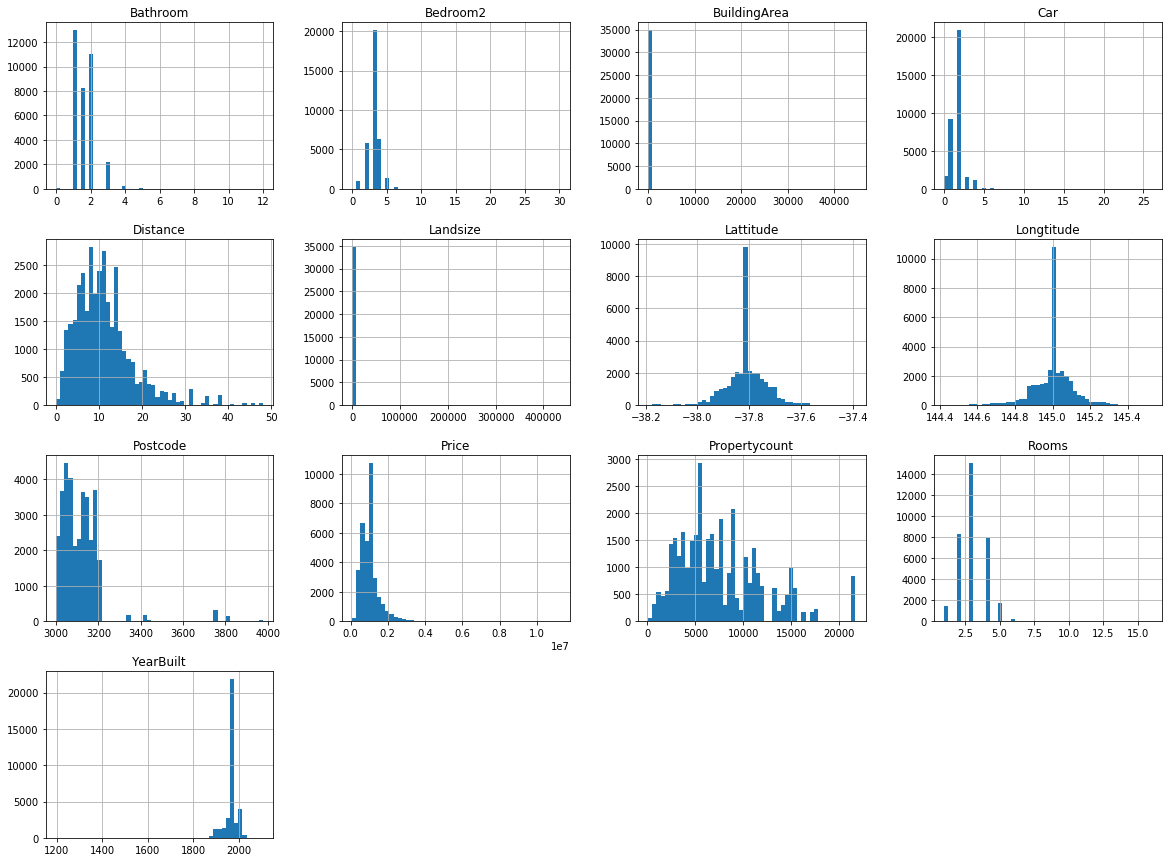

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

### Plotting the geographical data

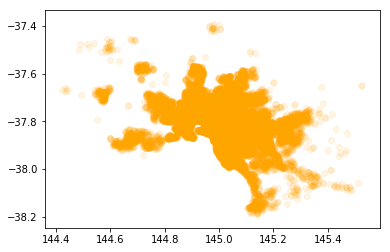

In [32]:
housing = data.copy()
housing_labels = housing['Price'].copy()
plt.scatter(housing.Longtitude, housing.Lattitude, alpha=0.1, color = "orange")
plt.show()

As expected, the result looks like Melbourne

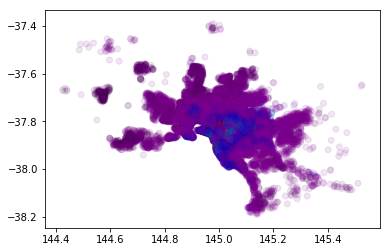

In [33]:
plt.scatter(housing.Longtitude, housing.Lattitude, alpha=0.1, c=housing.Price, cmap=plt.get_cmap("nipy_spectral"))
plt.show() 

From this plot, we can determine where the pricier housing is located.
(The colormap is from violet to light blue in increasing order of prices) 

### Removing text data and Price from the data to make the data suitable for applying regression techniques 

In [61]:
housing_float = housing.drop(['Suburb','Address','Type','Method','SellerG','Date','CouncilArea','Regionname','Price'],axis=1)
housing_float.mean()

Rooms               3.031012
Distance           11.184929
Postcode         3116.062859
Bedroom2            3.084647
Bathroom            1.624798
Car                 1.728845
Landsize          593.598993
BuildingArea      160.256400
YearBuilt        1965.289885
Lattitude         -37.810634
Longtitude        145.001851
Propertycount    7572.888306
dtype: float64

## Creating Regression Models to Predict Housing Prices and Evaluating them using RMSE

### Linear Regression:

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

housing_train, housing_test = train_test_split(housing_float, test_size=0.2, random_state=69)
price_train, price_test = train_test_split(housing_labels, test_size=0.2, random_state=69)

linreg = LinearRegression()
linreg.fit(housing_train, price_train)
price_pred_linreg = linreg.predict(housing_test)

rmse_linreg = np.sqrt(mean_squared_error(price_test, price_pred_linreg))
print(rmse_linreg)

464825.2754633031


### Decision Tree Regression

In [86]:
from sklearn.tree import DecisionTreeRegressor
decision_reg = DecisionTreeRegressor()
decision_reg.fit(housing_train, price_train)
price_pred_dtr = decision_reg.predict(housing_test)

rmse_dtr = np.sqrt(mean_squared_error(price_test, price_pred_dtr))
print(rmse_dtr)

536305.4604579292


### Support Vector Machine Regression

In [89]:
from sklearn import svm
svr = svm.SVR() 
nu_svr = svm.NuSVR()
lin_svr = svm.LinearSVR()

svr.fit(housing_train, price_train)
nu_svr.fit(housing_train, price_train)
lin_svr.fit(housing_train, price_train)

price_pred_svr = svr.predict(housing_test)
price_pred_nusvr = nu_svr.predict(housing_test)
price_pred_linsvr = lin_svr.predict(housing_test)

rmse_svr = np.sqrt(mean_squared_error(price_test, price_pred_svr))
rmse_nusvr = np.sqrt(mean_squared_error(price_test, price_pred_nusvr))
rmse_linsvr = np.sqrt(mean_squared_error(price_test, price_pred_linsvr))

print(rmse_svr, rmse_nusvr, rmse_linsvr)

C:\Users\Toxicr0ak\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Toxicr0ak\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Toxicr0ak\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


573945.9891174523 588282.5480650977 550383.8713396478


### Polynomial Regression

In [98]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
linreg4poly = LinearRegression()

poly_reg_housing_train = poly_reg.fit_transform(housing_train)
poly_reg_housing_test = poly_reg.fit_transform(housing_test)

linreg4poly.fit(poly_reg_housing_train, price_train)
price_pred_polyreg = linreg4poly.predict(poly_reg_housing_test)

rmse_polyreg = np.sqrt(mean_squared_error(price_test, price_pred_polyreg))
print(rmse_polyreg)

501206.81792132184


### Random Forest Regression

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(housing_train, price_train)
price_pred_rf = rf_reg.predict(housing_test)

rmse_rf = np.sqrt(mean_squared_error(price_test, price_pred_rf))
print(rmse_rf)

C:\Users\Toxicr0ak\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


420060.25771308556


From the RMSEs obtained from the various regression techniques used, the two best models are Linear Regression and Random Forest Regression.
Further evaluation of them needs to be done to determine the better one among them.

### Evaluating Linear Regression and Random Forest Models using Cross Validation

In [117]:
from sklearn.model_selection import cross_val_score

def display_scores(regressor):
    scores = cross_val_score(regressor, housing_train, price_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)

    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print("RMSE: ",rmse_scores)

In [119]:
display_scores(linreg)

Scores: [-2.63688568e+11 -1.98641140e+11 -1.87399950e+11 -3.50836314e+11
 -2.13121803e+11 -1.91075212e+11 -2.15912209e+11 -1.86442660e+11
 -1.87705501e+11 -2.08445714e+11]
Mean: -220326907084.18115
Standard deviation: 48731839445.59972
RMSE:  [513506.15161756 445691.75488341 432897.15861111 592314.37088868
 461651.17059924 437121.50708367 464663.54389164 431790.06435313
 433249.92857263 456558.55511852]


In [120]:
display_scores(rf_reg)

Scores: [-2.17848507e+11 -1.87008689e+11 -1.50512163e+11 -1.80103689e+11
 -1.91555847e+11 -1.81734264e+11 -1.80529349e+11 -1.59092390e+11
 -1.80124489e+11 -1.85727649e+11]
Mean: -181423703527.00958
Standard deviation: 17139662224.206797
RMSE:  [466742.44141298 432445.01219217 387958.9709782  424386.24993856
 437670.93437533 426303.01870432 424887.45468495 398863.87405284
 424410.75557716 430961.30755397]


From the RMSEs obtained, we can conclude that Random Forest Regression fits the data the best. 
Its parameters can be tested to discover better fittings. 

### Determing best parameters for Random Forest Regression Models using Grid Search

In [122]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
grid_search = GridSearchCV(rf_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_train, price_train)
print(grid_search.best_params_)

{'max_features': 2, 'n_estimators': 30}


### Recreating the model with the best parameters

In [123]:
rf_reg = RandomForestRegressor(n_estimators = 30, max_features = 2)
rf_reg.fit(housing_train, price_train)
price_pred_rf = rf_reg.predict(housing_test)

rmse_rf = np.sqrt(mean_squared_error(price_test, price_pred_rf))
print(rmse_rf)

408322.1649077943


In [124]:
display_scores(rf_reg)

Scores: [-2.09210510e+11 -1.72106869e+11 -1.39594616e+11 -1.66845412e+11
 -1.79562981e+11 -1.59098634e+11 -1.73468835e+11 -1.54054390e+11
 -1.66664665e+11 -1.75267137e+11]
Mean: -169587404865.39703
Standard deviation: 17291883253.23251
RMSE:  [457395.3540211  414857.64848481 373623.62921121 408467.14935805
 423748.72339535 398871.70115554 416495.89986574 392497.63101642
 408245.8392755  418649.18135805]


With optimal parameter values of max_features = 2 (number of features for best split) and n_estimators = 30 (number of trees in the forest), a better fitting model has been created.

## Conclusion

From all the tried regression techniques, the Random Forest Regression model provides the best fit to the data.
This model can be further improved by using optimal parameters determined by applying Grid Search or other search methods on the initial model. 